In [1]:
from data_analysis_codes import param
from data_analysis_codes.tools import PlottingTools as RPlot
from data_analysis_codes.tools import LinData
import numpy as np
import pandas as pd
from data_analysis_codes.tools import ReadingTools as RRead

In [2]:
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

In [3]:
def collect(p, zevars):
    pd = RPlot.getdata(p, zevars)
    e = RPlot.geterror_fromfile(p, 'h5', zevars)
    Lin = LinData.LinData_Class(p, '/home/robynm/simulations/'+p.sim_name+'/')
    return {'param':p, 'data':pd, 'error':e, 'lin':Lin}

def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    f32 = interpolate(interpolate(f32))
    f64 = interpolate(f64)
    while len(f32)<len(f128):
        f32 = extrapolate(f32)
    while len(f64)<len(f128):
        f64 = extrapolate(f64)
    c = abs(f32-f64)/abs(f64-f128)
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

In [4]:
def calcdata(simname):
    sim = RRead.read_parameters(simname)
    Lin = LinData.LinData_Class(sim)
    f = pd.read_table(sim['datapath']+'/constraints.csv', delimiter=',')
    an = Lin.evo.z(np.array(f['t']))
    return [an, abs(np.array(f['Ham/HamEScale_av']))]

In [5]:
an, N32 = calcdata('pflrw_A0_L1821_t1_N32_EdS')
an, N64 = calcdata('pflrw_A0_L1821_t1_N64_EdS')
A0_EdS = calcdata('pflrw_A0_L1821_t1_N128_EdS')
A0_EdS += [get_error(N32, N64, A0_EdS[1])]

an, N32 = calcdata('pflrw_A0_L1821_t1_N32_LCDM_CTDL')
an, N64 = calcdata('pflrw_A0_L1821_t1_N64_LCDM_CTDL')
A0_CTDL = calcdata('pflrw_A0_L1821_t1_N128_LCDM_CTDL')
A0_CTDL += [get_error(N32, N64, A0_CTDL[1])]

an, N32 = calcdata('pflrw_A0_L1821_t1_N32_LCDM')
an, N64 = calcdata('pflrw_A0_L1821_t1_N64_LCDM')
A0 = calcdata('pflrw_A0_L1821_t1_N128_LCDM')
A0 += [get_error(N32, N64, A0[1])]

an, N32 = calcdata('pflrw_A1e5_L1821_t1_N32_LCDM')
an, N64 = calcdata('pflrw_A1e5_L1821_t1_N64_LCDM')
A1e5 = calcdata('pflrw_A1e5_L1821_t1_N128_LCDM')
A1e5 += [get_error(N32, N64, A1e5[1])]

an, N32 = calcdata('pflrw_A1e5_L1821_t1_N32_LCDM_rho1st')
an, N64 = calcdata('pflrw_A1e5_L1821_t1_N64_LCDM_rho1st')
A1e5_rho1st = calcdata('pflrw_A1e5_L1821_t1_N128_LCDM_rho1st')
A1e5_rho1st += [get_error(N32, N64, A1e5_rho1st[1])]

an, N32 = calcdata('pflrw_A1e5_L1821_t1_N32_LCDM_rhoPHam')
an, N64 = calcdata('pflrw_A1e5_L1821_t1_N64_LCDM_rhoPHam')
A1e5_rhoPHam = calcdata('pflrw_A1e5_L1821_t1_N128_LCDM_rhoPHam')
A1e5_rhoPHam += [get_error(N32, N64, A1e5_rhoPHam[1])]

an, N32 = calcdata('pflrw_A1e4_L1821_t1_N32_LCDM')
an, N64 = calcdata('pflrw_A1e4_L1821_t1_N64_LCDM')
A1e4 = calcdata('pflrw_A1e4_L1821_t1_N128_LCDM')
A1e4 += [get_error(N32, N64, A1e4[1])]

an, N32 = calcdata('pflrw_A1e3_L1821_t1_N32_LCDM')
an, N64 = calcdata('pflrw_A1e3_L1821_t1_N64_LCDM')
A1e3 = calcdata('pflrw_A1e3_L1821_t1_N128_LCDM')
A1e3 += [get_error(N32, N64, A1e3[1])]

an, N32 = calcdata('pflrw_d3e2_L1821_t1_N32_LCDM')
an, N64 = calcdata('pflrw_d3e2_L1821_t1_N64_LCDM')
d3e2 = calcdata('pflrw_d3e2_L1821_t1_N128_LCDM')
d3e2 += [get_error(N32, N64, d3e2[1])]

an, N32 = calcdata('pflrw_d3e2_L1206_t1_N32_EdS')
an, N64 = calcdata('pflrw_d3e2_L1206_t1_N64_EdS')
d3e2_EdS = calcdata('pflrw_d3e2_L1206_t1_N128_EdS')
d3e2_EdS += [get_error(N32, N64, d3e2_EdS[1])]

 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file
 read time file


In [6]:
def plot(P, lab, col='C0', ls='-', cut=False):
    if cut:
        ic = -1400
        an = P[0]
        plt.loglog(an[:ic], P[1][:ic], label=lab, color=col, linestyle=ls, linewidth=5)
        plt.fill_between(an[:ic], P[1][:ic]+P[2][:ic], P[1][:ic]-P[2][:ic], facecolor=col, edgecolor=col, alpha=0.05)
    else:
        an = P[0]
        plt.loglog(an, P[1], label=lab, color=col, linestyle=ls, linewidth=5)
        plt.fill_between(an, P[1]+P[2], P[1]-P[2], facecolor=col, edgecolor=col, alpha=0.05)

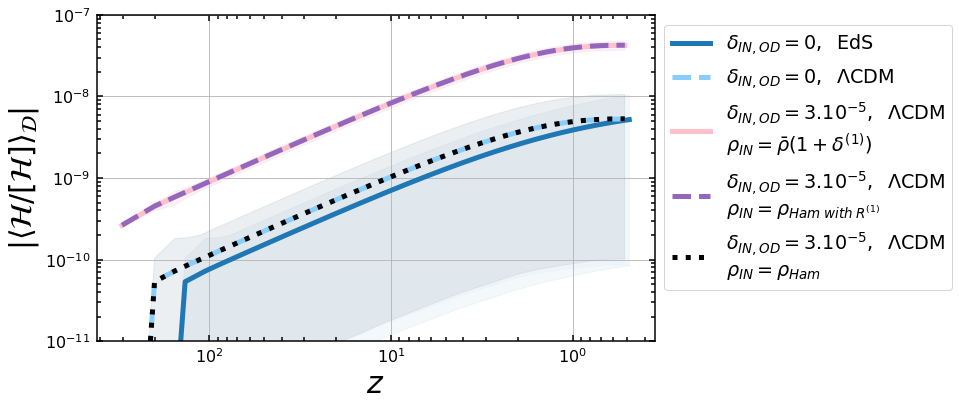

In [9]:
plt.figure(figsize=(10,6))
plot(A0_EdS, r'$\delta_{IN, OD}=0 ,\;\;$EdS', col='C0', cut=True)
plot(A0, r'$\delta_{IN, OD}=0 ,\;\; \Lambda$CDM', col='lightskyblue', ls='--')

lab = r'$\delta_{IN, OD}=3.10^{-5} ,\;\; \Lambda$CDM'+'\n'+r'$\rho_{IN}=\bar{\rho}(1+\delta^{(1)})$'
plot(A1e5_rho1st, lab, col='pink')
lab = r'$\delta_{IN, OD}=3.10^{-5} ,\;\; \Lambda$CDM'+'\n'+r'$\rho_{IN}=\rho_{Ham\;with \; R^{(1)}}$'
plot(A1e5_rhoPHam, lab, col='C4', ls='--')
lab = r'$\delta_{IN, OD}=3.10^{-5} ,\;\; \Lambda$CDM'+'\n'+r'$\rho_{IN}=\rho_{Ham}$'
plot(A1e5, lab, col='k', ls=':')

#lab = r'$\delta_{IN, OD}=3.10^{-4} ,\;\; \Lambda$CDM'+'\n'+r'$\rho_{IN}=\rho_{Ham}$'
#plot(A1e4, lab, col='C1', ls=':')
#lab = r'$\delta_{IN, OD}=3.10^{-3} ,\;\; \Lambda$CDM'+'\n'+r'$\rho_{IN}=\rho_{Ham}$'
#plot(A1e3, lab, col='C2', ls=':')
#lab = r'$\delta_{IN, OD}=3.10^{-2} ,\;\; \Lambda$CDM'+'\n'+r'$\rho_{IN}=\rho_{Ham}$'
#plot(d3e2, lab, col='C3', ls=':')
#lab = r'$\delta_{IN, OD}=3.10^{-2} ,\;\; $EdS'+'\n'+r'$\rho_{IN}=\rho_{Ham}$'
#plot(d3e2_EdS, lab, col='C4', ls=':')

plt.legend(bbox_to_anchor=(1, 1))#0.71869531254))
plt.grid()
plt.ylabel(r'$|\langle\mathcal{H}/[\mathcal{H}]\rangle_{\mathcal{D}}|$', fontsize=30)
plt.ylim(1e-11, 1e-7)
#plt.xlim(4e2, 4e-1)
plt.gca().invert_xaxis()
plt.xlabel(r'$z$', fontsize=30)
plt.savefig('Plots/Ini_Ham.pdf', bbox_inches = 'tight')

In [44]:
np.median([3e-2, 3e-5]), 7.5e-4

0.015014999999999999

In [ ]:
P = P128
plt.figure()
plt.loglog(P[0]['data']['z'], abs(P[0]['data']['Ham_L1constraint']), label=P[0]['param'].sim_name)
plt.loglog(P[1]['data']['z'], abs(P[1]['data']['Ham_L1constraint']), '-.', label=P[1]['param'].sim_name)
plt.loglog(P[2]['data']['z'], abs(P[2]['data']['Ham_L1constraint']), label=P[2]['param'].sim_name)
plt.loglog(P[3]['data']['z'], abs(P[3]['data']['Ham_L1constraint']), linestyle='--', label=P[3]['param'].sim_name)
plt.loglog(P[4]['data']['z'], abs(P[4]['data']['Ham_L1constraint']), 'k:', label=P[4]['param'].sim_name)
plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.title('Ham_L1constraint')
#plt.ylim(1e-10, 5e-7)
plt.xlim(350, 1)
plt.xlabel(r'$a/a_{IN}$')

In [ ]:
P = P16[1] #P128[1] # 
plt.figure()
x = 'z'
#plt.loglog(P['data'][x], abs(P['data']['Ham_L1constraint']), color='C0', label='relative Ham')
#plt.loglog(P['data'][x], abs(P['data']['Ham_av']), color='b', label='Ham')
#plt.loglog(P['data'][x], abs(P['data']['RicciS_av']), color='C1', label='R')
#plt.loglog(P['data'][x], abs(P['data']['a_av']), color='C', label='a')
#plt.loglog(P['data'][x], abs(P['data']['K_av']), color='C2', label='K')
#plt.loglog(P['data'][x], abs((1/3)*P['data']['K_av']**2), color='C5', label=r'$\frac{1}{3}K^2$')
#plt.loglog(P['data'][x], abs(P['data']['A2_av']), color='C3', label='A^2')
#plt.loglog(P['data'][x], abs(P['data']['rho_av']), color='C4', label=r'$\rho$')
#plt.loglog(P['data'][x], abs(P['lin'].kappa*P['data']['rho_av']), color='C6', linestyle=':', label=r'$\kappa\rho$')
plt.loglog(P['data'][x], abs((1/3)*P['data']['K_av']**2-P['lin'].kappa*P['data']['rho_av']), color='C7', label=r'$\frac{1}{3}K^2-\kappa\rho$')
plt.loglog(P['data'][x], abs(P['data']['K_av']-P['lin'].K(P['data']['t'])), color='k', label=r'$K-\bar{K}$')
plt.loglog(P['data'][x], abs(P['data']['rho_av']-P['lin'].rho(P['data']['t'])), color='m', label=r'$\rho-\bar{\rho}$')
plt.loglog(P['data'][x], len(P['data'][x])*[abs(P['lin'].Lambda)], linestyle=':', color='C8', label=r'$\Lambda$')
#plt.loglog(P['data'][x], abs((1/3)*P['data']['K_av']**2-P['lin'].kappa*P['data']['rho_av']-P['lin'].Lambda), color='C9', label=r'$\frac{1}{3}K^2-\kappa\rho-\Lambda$')

plt.legend(bbox_to_anchor=(1,1))
plt.grid()
plt.title(P['param'].sim_name)
#plt.ylim(1e-10, 5e-7)
plt.xlim(350, 1.6)
plt.xlabel(r'$z$')

In [ ]:
plt.semilogy(P[0]['data']['an'], abs(P[0]['data']['Mom_av']), label='Ham_av')
plt.semilogy(P[0]['data']['an'], abs(P[0]['data']['Mom_L1']), label='Ham_L1')
plt.semilogy(P[0]['data']['an'], abs(P[0]['data']['Mom_cent']), label='Ham_cent')
plt.semilogy(P[0]['data']['an'], abs(P[0]['data']['Mom_L1error']), label='Ham_L1error')

plt.semilogy(P[0]['data']['an'], abs(P[0]['data']['MomEScale_av']), label='HamEScale_av')
plt.semilogy(P[0]['data']['an'], abs(P[0]['data']['MomEScale_L1']), label='HamEScale_L1')
plt.semilogy(P[0]['data']['an'], abs(P[0]['data']['MomEScale_cent']), label='HamEScale_cent')
plt.semilogy(P[0]['data']['an'], abs(P[0]['data']['MomEScale_L1error']), label='HamEScale_L1error')

plt.semilogy(P[0]['data']['an'], abs(P[0]['data']['Mom_L1constraint']), label='Ham_L1constraint')

plt.legend(bbox_to_anchor=(1,1))
#plt.xlim(320, 1.5)

In [ ]:
for pl in P:
    print(pl['param'].sim_name+' dtmax = {}, dtused = {}'.format(pl['data']['a'][0]*pl['param'].dx, pl['param'].dtfac*pl['param'].dx))

In [ ]:
#plt.figure(figsize=(20, 10))
for var in ['Ham_av', 'Ham1_av', 'HamWithLambda_av', 'Ham_L1', 'Ham_L1constraint']:
    plt.figure()
    for pl in P:
        x = pl['data']['z']#a_av']/pl['data']['a_av'][0]
        if pl['param'].expansion_ini=='LCDM' and pl['param'].expansion_evo=='LCDM':
            plt.loglog(x, abs(pl['data'][var]), marker='+', linestyle=':', color='c', label='LCDM_ini & LCDM_evo')
        else:
            if pl['param'].expansion_ini=='LCDM':
                lab = 'LCDM_ini & EdS_evo'
            else:
                lab = 'EdS_ini & EdS_evo'
            plt.loglog(x, abs(pl['data'][var]), marker='o', label=lab)
    plt.title(var)
    plt.grid()
    plt.xlabel(r'$z$')#a/a_{IN}$')
    #plt.title(pl['param'].sim_name)
    plt.legend(bbox_to_anchor=(1,1))
    plt.ylabel(r'$\langle Ham\rangle_{\mathcal{D}}$')
    plt.xlim(350, 0.9)

In [ ]:
x = 'an'
for pd in [pzc0_data, pzcIN_data]:
    plt.figure(figsize=(20, 7.5))

    plt.subplot(121)
    RPlot.plot_locations(x, 'MomA', pd, pt='semilogy')
    plt.grid()
    plt.xlabel(r'$a/a_{IN}$')
    plt.title(r'$z_R=$'+'{:.2f}'.format(pzc0.zc))

    plt.subplot(122)
    RPlot.plot_locations(x, 'MomK', pd, pt='semilogy')
    plt.grid()
    plt.xlabel(r'$a/a_{IN}$')
    plt.title(r'$z_R=$'+'{:.2f}'.format(pzc0.zc))
    plt.legend(bbox_to_anchor=(1,1), fontsize=15)